# Memory recovery with Python

As in actual memories.

It's pictures, I'm talking about pictures.

Over 10 years ago I participated in a World of Warcraft community event called *Warcraft Battlecry*, commemorating
the game's 5th anniversary, the event had fans sending pictures showing
support with their faction logo, the goal was to gather 20.000 pictures and use them on a big mosaic showing game
characters, here's the final mosaic and it shows all the race leaders at the time *(spoilers: times sure have changed)*:

![Battlecry](mosaic_smaller.jpg)

The image has been scaled down, the original can be found [here.](http://us.media.blizzard.com//wow/anniversary/_images/ilovesc/wallpapers/source-mosaic-14400x6150.jpg)


Back then I submitted two pictures which unfortunately I never saved properly and somehow lost them.
No big deal I
thought, just go to the event site and download them, but what do you know it's been 10 years and the
[site is no longer available](https://worldofwarcraft.com/en-us/wowanniversary/battlecry) so no luck there.

My second thought
was to check [wayback machine](https://archive.org/web/) the *digital archive of the World Wide Web*, and after what seemed like countless hours looking at website snapshots,
I finally gave up because there was nothing useful there.

And that could be the end of this blog post, but fortunately I kept searching and eventually came across a forum discussing the event
where users had shared their submissions, and among them I noticed that the images they linked where hosted on Blizzard media
servers and they still worked! Finally some hope, the links have this format:

us.media.blizzard.com/wow/anniversary/_images/ilovesc/gallery/full/**xxxx**.jpg

With **xxxx** being random numbers, except they are not random and if you been paying attention you might have guessed that
they are just enumerated from 1 to 20000, the number of submissions of the event.

Now I just have to check 20000 links to find my pictures, about 2 days worth of fun! But instead of having fun I wrote a
short Python code to download all images:

I'm using the [requests](https://requests.readthedocs.io/en/master/) library to retrieve the image data and
[pillow](https://pillow.readthedocs.io/en/stable/) to save them.

In [ ]:
import time
import requests
from PIL import Image
from io import BytesIO

for i in range(1, 20001):
    try:
        response = requests.get('http://us.media.blizzard.com/wow/anniversary/_images/ilovesc/gallery/full/'+str(i)+'.jpg')
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img.save('images/'+str(i)+'.jpg')
        time.sleep(1)
    except:
        continue

Catching errors due to missing pictures with the try/except block and added a time delay in between requests, would't want to get IP blocked
for making too many requests too quickly, so just in case.

Now I have nearly 20000 pictures in a folder and I guess I could try finding the one's I'm looking for searching one-by-one, by skimming
through or maybe just randomly scrolling through the folder and hoping for some luck, but instead and unsurprisingly I write some Python code.

So, I need to check every image and decide how similar they are to the ones I'm looking for, but how can I tell if
something is similar to what I'm looking if I haven't found it?
Well, it turns out that I do have them it's just that they are really tiny and pixelated and part of the mosaic! And for
some reason I remember exactly where my submissions are on the mosaic (having to look for them on the mosaic would defeat
all purpose and no different than looking at the folder).

On Thrall's forehead and on the sky high above Thrall's right shoulder, knowing this and the size of each image in the mosaic:

In [46]:
mosaic = Image.open('source-mosaic.jpg')

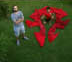

In [47]:
cropped1 = mosaic.crop((72*81, 62*39, 72*82, 62*40))
cropped1

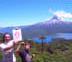

In [48]:
cropped2 = mosaic.crop((72*92, 62*3, 72*93, 62*4))
cropped2

Yup, that's them alright.

For the final part I use the [scikit-image](https://scikit-image.org/) open source library, specifically the
[structural similarity](https://en.wikipedia.org/wiki/Structural_similarity) metric which
computes the mean structural similarity index between two images.

In [ ]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import glob

image_list = glob.glob('images/*.jpg')

In [ ]:
rms_dict = {}
ssim_dict = {}
for image in image_list:
    current_img = Image.open(image).resize((72, 62))
    ssim_dict[image] = max(ssim(img_as_float(current_img), img_as_float(cropped1), multichannel=True),
                           ssim(img_as_float(current_img), img_as_float(cropped2), multichannel=True))

In [ ]:
sort_ssim_dict = sorted(ssim_dict.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sort_ssim_dict[:10]

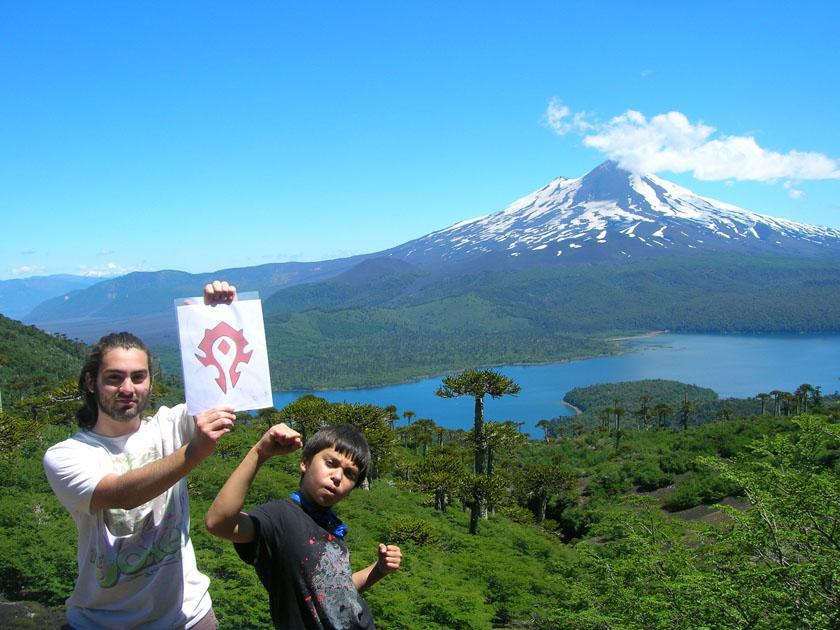

In [44]:
Image.open(sort_ssim_dict[0][0])

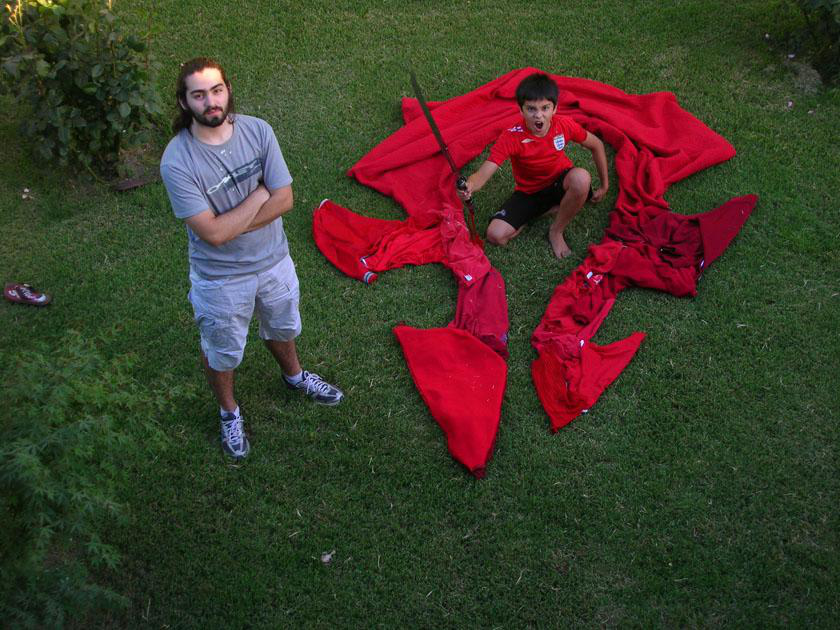

In [45]:
Image.open(sort_ssim_dict[1][0])

# For the Horde!
